<a href="https://colab.research.google.com/github/rijoy02/ml_datasets/blob/main/Sequential_sentence_classification_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.11.0


In [2]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



### Get the raw data
https://github.com/Franck-Dernoncourt/pubmed-rct

In [3]:
raw_data_git_path = "https://github.com/Franck-Dernoncourt/pubmed-rct"

In [4]:
!git clone {raw_data_git_path}

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), 177.08 MiB | 12.34 MiB/s, done.


In [5]:
!ls /content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [6]:
!cat /content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt|head -10

###24293578
OBJECTIVE	To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
METHODS	A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .
METHODS	Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .
METHODS	Pain was assessed using the visual analog pain scale ( @-@ mm ) .
METHODS	Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .
METHODS	Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP 

In [7]:
from pathlib import Path
list(Path("/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign").rglob('*'))

[PosixPath('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt'),
 PosixPath('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt'),
 PosixPath('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt')]

### Let's do some automation in getting the dataset 

In [8]:
# define the variables
folder_path = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"


In [9]:
list(Path(folder_path).rglob("*dev*"))

[PosixPath('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt')]

In [10]:
# find the train, dev and test dataset files
from pathlib import Path
train_file = list(Path(folder_path).rglob("*train*"))[0]
dev_file = list(Path(folder_path).rglob("*dev*"))[0]
test_file = list(Path(folder_path).rglob("*test*"))[0]

In [11]:
!head {train_file}

###24293578
OBJECTIVE	To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
METHODS	A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .
METHODS	Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .
METHODS	Pain was assessed using the visual analog pain scale ( @-@ mm ) .
METHODS	Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .
METHODS	Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP 

In [12]:
f = open(train_file, 'r')
train_list = f.readlines()

In [13]:
len(train_list)

210040

In [14]:
!wc -l {train_file}

210040 /content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt


In [15]:
def get_lines(filename):
  '''
  provide the filename as an argument

  returns the file contents , each sentences converted into a list pf string values
  '''
  f = open(filename, 'r')
  return f.readlines()

In [16]:
# creates a list of variables for the train, test, and validation dataset
train_list = get_lines(train_file)
dev_list = get_lines(dev_file)
test_list = get_lines(test_file)

In [17]:
train_list[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

**INPUT**
['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',...]

**OUTPUT:**
[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
  ...]

#convert list of strings into a list of dictionary

**INPUT**
```
['###Abstract ID 1\n',
 'Objective\ttarget_text1\n',
 'Method\ttarget_text2\n',
 'Results\ttarget_text3\n',
 'Conclusions\ttarget_text3\n',
 '###Abstract ID 2\n',
 ...
 ]
```
 **OUTPUT**
```
[{'line_number':0, 'target':'Objective', 'text':'target_text1', 'total_lines':4},
 {'line_number':1, 'target':'Method', 'text':'target_text2', 'total_lines':4},
 ...
 ]
```



In [18]:
train_list[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [19]:
[{'line_no':i-1, 
  'target':train_list[i].split('\t')[0]
  # 'text':train_list[i].split('\t')[1] 
  } for i in range(30) if train_list[i].split('\t')[0] != '\n' and not '###' in train_list[i]]

[{'line_no': 0, 'target': 'OBJECTIVE'},
 {'line_no': 1, 'target': 'METHODS'},
 {'line_no': 2, 'target': 'METHODS'},
 {'line_no': 3, 'target': 'METHODS'},
 {'line_no': 4, 'target': 'METHODS'},
 {'line_no': 5, 'target': 'METHODS'},
 {'line_no': 6, 'target': 'RESULTS'},
 {'line_no': 7, 'target': 'RESULTS'},
 {'line_no': 8, 'target': 'RESULTS'},
 {'line_no': 9, 'target': 'RESULTS'},
 {'line_no': 10, 'target': 'RESULTS'},
 {'line_no': 11, 'target': 'CONCLUSIONS'},
 {'line_no': 14, 'target': 'BACKGROUND'},
 {'line_no': 15, 'target': 'BACKGROUND'},
 {'line_no': 16, 'target': 'OBJECTIVE'},
 {'line_no': 17, 'target': 'OBJECTIVE'},
 {'line_no': 18, 'target': 'METHODS'},
 {'line_no': 19, 'target': 'METHODS'},
 {'line_no': 20, 'target': 'METHODS'},
 {'line_no': 21, 'target': 'RESULTS'},
 {'line_no': 22, 'target': 'RESULTS'},
 {'line_no': 23, 'target': 'CONCLUSIONS'},
 {'line_no': 24, 'target': 'CONCLUSIONS'},
 {'line_no': 27, 'target': 'BACKGROUND'},
 {'line_no': 28, 'target': 'BACKGROUND'}]

In [20]:
[i for i in range(30) if '###' in train_list[i] or train_list[i].split('\t')[0] == '\n']

[0, 13, 14, 26, 27]

In [21]:
for i in range(len(train_list[:10])):
  if '###' in train_list[i]:
    abstract_id = train_list[0].split('\n')
  else:
    print(f'{abstract_id[0]}\t{train_list[i]}')

###24293578	OBJECTIVE	To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .

###24293578	METHODS	A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .

###24293578	METHODS	Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .

###24293578	METHODS	Pain was assessed using the visual analog pain scale ( @-@ mm ) .

###24293578	METHODS	Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .

###24293578	METHODS	Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis fa

### Preprocessing the text - Approach 1 (**subset of data**)

In [22]:
transformed_train_list = []
counter = -1
for i in range(len(train_list[:50])):
  # for line 0 , extract the abstract id 
  if i==0:
     abstract_id = train_list[i].split('\n')[0].strip('#')
     prev_abstract_id=[]

  # for line 1 and above, follow the below logic
  if i !=0 and '###' in train_list[i]:
    prev_abstract_id = abstract_id
    abstract_id = train_list[i].split('\n')[0].strip('#') 
  else:
    prev_abstract_id=abstract_id

  #debug statement
  # print(f"Loop{i} - abstract_id: {abstract_id}, prev_abstract_id: {prev_abstract_id}, {abstract_id == prev_abstract_id}")
  #set the line counter
  if abstract_id != prev_abstract_id:
     counter = 0
  else:
     counter = counter + 1 

  # append the final output into a transformed list
  if train_list[i] != '\n' and not '###' in train_list[i]:
     transformed_train_list.append({
          'line_no':counter,
          'abstract_id':abstract_id,
          'target':train_list[i].split('\t')[0],
          'text':train_list[i].split('\t')[1]})
      


In [23]:
# verify the output
# transformed_train_list[:20]

In [24]:
# Load the transformed data into a dataframe
train_df = pd.DataFrame(transformed_train_list)

In [25]:
# calculate the total lines and add it to the dataframe
train_df["total_lines"] = train_df.groupby(["abstract_id"])["abstract_id"].transform("count")

In [26]:
train_df

,line_no,abstract_id,target,text,total_lines
0,1,24293578,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,12
1,2,24293578,METHODS,A total of @ patients with primary knee OA wer...,12
2,3,24293578,METHODS,Outcome measures included pain reduction and i...,12
3,4,24293578,METHODS,Pain was assessed using the visual analog pain...,12
4,5,24293578,METHODS,Secondary outcome measures included the Wester...,12
5,6,24293578,METHODS,"Serum levels of interleukin @ ( IL-@ ) , IL-@ ...",12
6,7,24293578,RESULTS,There was a clinically relevant reduction in t...,12
7,8,24293578,RESULTS,The mean difference between treatment arms ( @...,12
8,9,24293578,RESULTS,"Further , there was a clinically relevant redu...",12
9,10,24293578,RESULTS,These differences remained significant at @ we...,12


### Preprocessing the text - Approach 1 (**full dataset**)

In [27]:
train_list[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [28]:
# %%timeit
transformed_train_full_data_list = []
for i in range(len(train_list)):
  if i == 0:
    abstract_id = train_list[0].strip('#\n')
    prev_abstract_id = []
    counter = -1

  if i != 0 and '###' in train_list[i] :
    prev_abstract_id = abstract_id
    abstract_id = train_list[i].strip('#\n')
    counter = 0
  else:
    prev_abstract_id=abstract_id
    counter = counter + 1
  
  if train_list[i] != '\n' and not '###' in train_list[i]:
     transformed_train_full_data_list.append({"line_no": counter,
                                              "abstract_id": abstract_id,
                                              "target": train_list[i].split('\t')[0],
                                              "text": train_list[i].split('\t')[1]})


In [29]:
# load it into a dataframe
transformed_train_full_data_df = pd.DataFrame(transformed_train_full_data_list)
transformed_train_full_data_df.head()

,line_no,abstract_id,target,text
0,1,24293578,OBJECTIVE,To investigate the efficacy of @ weeks of dail...
1,2,24293578,METHODS,A total of @ patients with primary knee OA wer...
2,3,24293578,METHODS,Outcome measures included pain reduction and i...
3,4,24293578,METHODS,Pain was assessed using the visual analog pain...
4,5,24293578,METHODS,Secondary outcome measures included the Wester...


In [30]:
# verify whether the dataframe and train_list has equal number of elements
assert transformed_train_full_data_df.shape[0] == len(transformed_train_full_data_list)


In [31]:
# calculate and add total_lines to the dataframe for each row per abstract
transformed_train_full_data_df["total_lines"] = transformed_train_full_data_df.groupby("abstract_id")["abstract_id"].transform("count")
transformed_train_full_data_df.head()

,line_no,abstract_id,target,text,total_lines
0,1,24293578,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,12
1,2,24293578,METHODS,A total of @ patients with primary knee OA wer...,12
2,3,24293578,METHODS,Outcome measures included pain reduction and i...,12
3,4,24293578,METHODS,Pain was assessed using the visual analog pain...,12
4,5,24293578,METHODS,Secondary outcome measures included the Wester...,12


In [32]:
# drop the abstract_id column
# transformed_train_full_data_df.drop(columns=["abstract_id"], inplace=True)
transformed_train_full_data_df

,line_no,abstract_id,target,text,total_lines
0,1,24293578,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,12
1,2,24293578,METHODS,A total of @ patients with primary knee OA wer...,12
2,3,24293578,METHODS,Outcome measures included pain reduction and i...,12
3,4,24293578,METHODS,Pain was assessed using the visual analog pain...,12
4,5,24293578,METHODS,Secondary outcome measures included the Wester...,12
...,...,...,...,...,...
180035,8,26227186,RESULTS,For the absolute change in percent atheroma vo...,12
180036,9,26227186,RESULTS,"For PAV , a significantly greater percentage o...",12
180037,10,26227186,RESULTS,Both strategies had acceptable side effect pro...,12
180038,11,26227186,CONCLUSIONS,"Compared with standard statin monotherapy , th...",12


### Preprocessing the text - Approach 2 (**full dataset**)

In [67]:
def preprocess_abstract_text(filename):
    '''
    Args: pass filename to the function

    Returns transformed list with the preprocess text in the below format
    [{line_no: line number of the particular abstract,
    target: 'OBJECTIVE',
    text:'@@@###$$@!!###',
    total_words_per_line: @@,
    total_lines: total lines in an abstract
    }...]

    '''
    transformed_data=[]
    file_lines = get_lines(filename)
    # print(file_lines[:27])
    for line in file_lines:
      if line.startswith("###"): # check to see if line is an ID line
          abstract_id = line
          abstract_lines = "" # reset abstract string
          # print(abstract_id)
      elif line == '\n': # check to see if line is a new line
          abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines
          # print(abstract_line_split)
          for abstract_line_number, abstract_line in enumerate(abstract_line_split):
            line_data = {"line_no":abstract_line_number,
                        "target":abstract_line.split('\t')[0],
                        "text": abstract_line.split('\t')[1],
                        "total_words_per_line":len(abstract_line.split('\t')[1].split(' ')),
                        "total_lines":len(abstract_line_split)}
            # print(line_data)
            transformed_data.append(line_data)          
      else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
          abstract_lines += line
    return transformed_data

In [68]:
# use the above function to preprocess the train , validation and test data
train_data = preprocess_abstract_text(train_file)
validation_data = preprocess_abstract_text(dev_file)
test_data = preprocess_abstract_text(test_file)

In [70]:
len(train_data), len(validation_data), len(test_data)

(180040, 30212, 30135)

In [69]:
# Load teh above datasets into a datframe
train_df = pd.DataFrame(train_data)
validation_df = pd.DataFrame(validation_data)
test_df = pd.DataFrame(test_data)

### Let's visualize the dataset now

In [71]:
# check the count distribution of target types
train_df["target"].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

In [72]:
# check pct distribution of the target types
(train_df["target"].value_counts() / train_df["target"].count()) * 100

METHODS        32.966563
RESULTS        32.188958
CONCLUSIONS    15.089980
BACKGROUND     12.067874
OBJECTIVE       7.686625
Name: target, dtype: float64

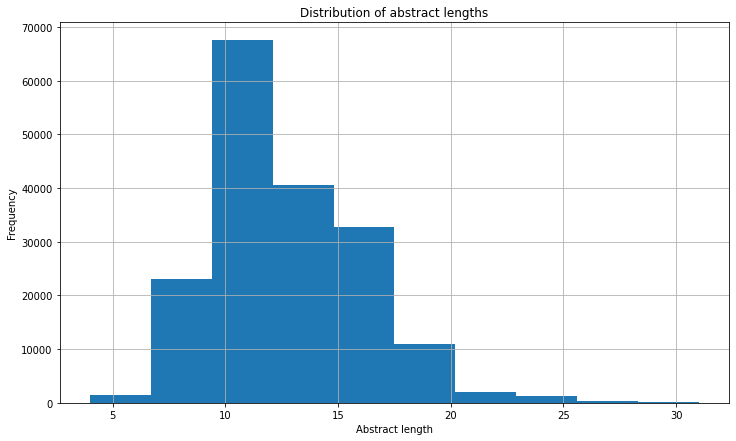

In [73]:
# check the distribution of our abstract lengths
train_df.total_lines.hist(figsize=(12, 7))
plt.xlabel("Abstract length")
plt.ylabel("Frequency")
plt.title("Distribution of abstract lengths")
plt.show()

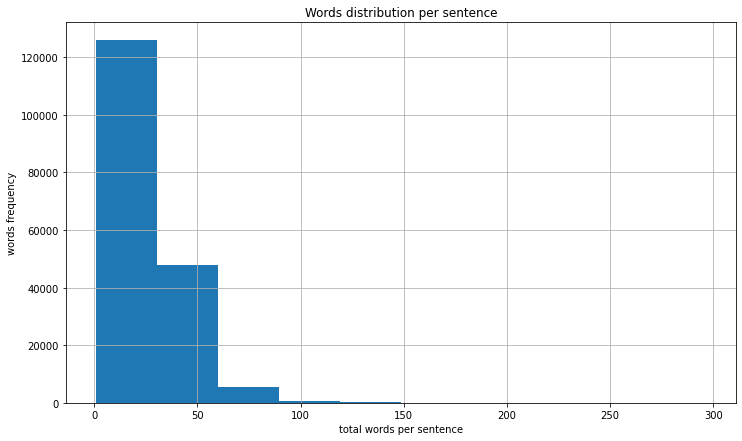

In [78]:
# CHECK THE distribution of words per sentence
train_df["total_words_per_line"].hist(figsize=(12, 7));
plt.xlabel("total words per sentence")
plt.ylabel("words frequency")
plt.title("Words distribution per sentence")
plt.show()

In [40]:
I # Get the list of sentences
train_sentences = train_df["text"].tolist()
validation_sentences = validation_df["text"].tolist()
test_sentences = test_df["text"].tolist()

In [41]:
len(train_sentences), len(validation_sentences), len(test_sentences)

(180040, 30212, 30135)

### Convert the labels into numerical value

In [42]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='error')
train_labels_one_hot = enc.fit_transform(np.array(train_df.target).reshape(-1, 1))
validation_labels_one_hot = enc.transform(np.array(validation_df.target).reshape(-1, 1))
test_labels_one_hot = enc.transform(np.array(test_df.target).reshape(-1, 1))

In [43]:
train_labels_one_hot

<180040x5 sparse matrix of type '<class 'numpy.float64'>'
	with 180040 stored elements in Compressed Sparse Row format>

In [44]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, handle_unknown='error')
train_labels_one_hot = enc.fit_transform(np.array(train_df.target).reshape(-1, 1))
validation_labels_one_hot = enc.transform(np.array(validation_df.target).reshape(-1, 1))
test_labels_one_hot = enc.transform(np.array(test_df.target).reshape(-1, 1))

In [45]:
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_tgt_labeled = le.fit_transform(train_df.target.to_numpy())
validation_tgt_labeled = le.transform(validation_df.target.to_numpy())
test_tgt_labeled = le.transform(test_df.target.to_numpy())

In [47]:
#check the length of the encoded data
len(train_tgt_labeled), len(validation_tgt_labeled), len(test_tgt_labeled)

(180040, 30212, 30135)

In [48]:
le.classes_

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)